In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
X = np.loadtxt('logistic_data/logistic_x.txt')
y = np.loadtxt('logistic_data/logistic_y.txt')

In [3]:
## Convert -1's to 0's as it's more convenient for the cross entropy cost function
y = np.where(y == -1, 0, y)
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [4]:
y.shape
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Logistic Regression Loss Function

$$J(\theta) = \frac{1}{1 + e^{-y(wx + b)}}$$

Parameter set $\theta$ is composed of w and b.


In [5]:
# Declaring the parameters as zero vectors with appropriate sizes
weights = np.zeros(2)
bias = 0

def sigmoid(z):
  return 1.0 / (1 + np.exp(-z))


# Use cross entropy loss function
def cost(predictions, labels):

  #Error when label = 1
  class1_cost = labels*np.log(predictions)
  #Error when label= 0
  class2_cost = (1-labels)*np.log(1-predictions)

  return np.mean(class1_cost - class2_cost)



def update(X,y,prediction):

  dw = (1/99)*np.dot(X.T, (prediction - y))
  db = (1/99)*np.sum((prediction - y)) 
  
  return dw, db

weights.shape

(2,)

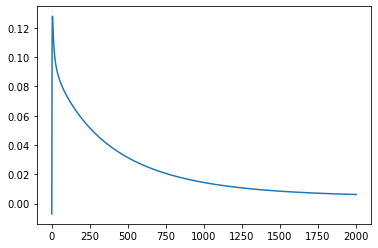

Weights: [0.6921871  1.19448306]
Bias: -2.243681135462737
Accuracy: 0.8787878787878788


In [9]:

def gd_optimizer(max_iter, step, weights, bias, X, y):
    
    loss_array = []

    for i in range(max_iter):
        # Make prediction
        prediction = sigmoid(np.dot(weights,X.T) + bias)
        dw = (1/99) * np.dot(X.T, (prediction - y))
        db = (1/99) * np.sum((prediction - y))  
        weights = weights - step * dw
        bias = bias - step * db
        loss = cost(prediction, y)
        loss_array.append(loss)

    return weights, bias, loss_array    

max_iter = 2000
updated_weights, updated_bias, loss_array = gd_optimizer(max_iter,0.1,weights,bias, X, y)

## Perform the final prediction
predictions = sigmoid(np.dot(updated_weights,X.T) + updated_bias)
pred_class = [1 if i > 0.5 else 0 for i in predictions]
accuracy = np.sum(y == pred_class) / len(y)
epochs = np.linspace(0,max_iter,max_iter)
plt.plot(epochs,loss_array)
plt.show()
accuracy
print("Weights: {weights}".format(weights = updated_weights))
print("Bias: {bias}".format(bias = updated_bias))
print("Accuracy: {accuracy}".format(accuracy = accuracy))



## Decision Boundary Equation

In [27]:
x0 = X[:,0]
x1 = X[:,1]
w1 = updated_weights[0]
w2 = updated_weights[1]
b = updated_bias

db = (-w1/w2) * x0 - (b/w2)



0.571

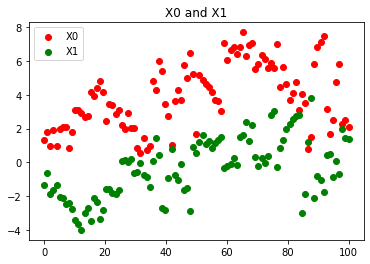

In [30]:
z = np.linspace(0,100,99)
plt.figure()
x0_points = plt.scatter(z,x0,c="red")
x1_points = plt.scatter(z,x1,c="green")
plt.title("X0 and X1")
plt.legend((x0_points,x1_points),("X0","X1"))
plt.show()

### Plot with Decision Boundary

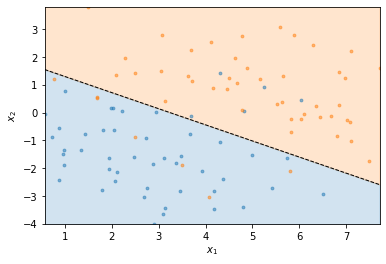

In [31]:
x0min, x0max = x0.min(), x0.max()
x1min, x1max = x1.min(), x1.max()
m = (-w1/w2)
c = (-b/w2)

xd = np.array([x0min, x0max])
yd = m * xd + c

plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, x1min, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, x1max, color='tab:orange', alpha=0.2)

plt.scatter(*X[y==0].T, s=8, alpha=0.5)
plt.scatter(*X[y==1].T, s=8, alpha=0.5)
plt.xlim(x0min, x0max)
plt.ylim(x1min, x1max)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')
plt.show()